## Introduction

**In the 2021-22 academic year, I implemented a major curriculum change - throughgoing incorporation of argument diagramming exercises (using MindMup: https://www.mindmup.com/tutorials/argument-visualization.html) - in a class that I was teaching on scientific reasoning, evidence, and argumentation.**

**I was inspired to make this curricular change, in part, by empirical results I'd seen from a study carried out in Princeton University introductory philosophy classes: https://www.nature.com/articles/s41539-018-0038-5. I decided to gather similar data in my own class to see if the results were similar in a somewhat different setting (9th-graders vs. college freshmen, a class focused on scientific argumentation rather than philosophical argumentation, year-long vs. semester class, online vs. in-person, etc.). I was not able to run this as an experiment or quasi-experiment (as in the Princeton study), but I thought the results in a new setting could still be a useful supplement.**

**As in the Princeton study, the main measurable outcome was performance on the LSAT Logical Reasoning section. Students took one such section at the beginning of the year and a different section at the end of the year (with standard time limits, unless students had school-sanctioned accommodations, and with the order of the two sections randomized).** 

**The results for my class were in line with those seen in the Princeton study: on average, students answered substantially more questions correctly at the end of the year than they did at the beginning. More specifically, depending on how the analysis was done (see below), their scores improved by 1.6 to 2.1 correct answers out of 26 questions. This improvement was highly statistically significant (P=0.0002) and the equivalent of moving from the ~31st to ~45th percentile of LSAT takers.**

## Loading & Preparing Data

**Note: the data was originally compiled in an Excel spreadsheet with no plan for conversion to a dataframe, so relatively substantial data cleaning turned out to be required (despite the data set being quite small).**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Argument Assessment Data.csv')

In [4]:
# Anonymize 
df.drop('Name',axis=1,inplace=True)

In [5]:
df

,Group,Pre-test,Pre-test (standardized to 26 max),Time,Post-test,Post-test (standardized to 26 max),Time.1
0,1.0,9.0,9.36,32.0,17,NaN,35.0
1,1.0,8.0,8.32,27.0,18,NaN,17.0
2,1.0,25.0,26.00,34.0,26-cheat,NaN,35.0
3,1.0,3.0,3.12,35.0,10,NaN,35.0
4,1.0,10.0,10.40,35.0,17,NaN,32.0
...,...,...,...,...,...,...,...
114,2.0,11.0,NaN,35.0,25-cheat,NaN,14.0
115,2.0,11.0,NaN,53.0,10,10.40,38.0
116,2.0,17.0,NaN,24.0,19-cheat,NaN,15.0
117,2.0,22.0,NaN,16.0,25-cheat,NaN,26.0


**Some scores were highly suspicious, usually because the score was very high AND the online quizzing system logged multiple departures from the browser window containing the quiz. These are flagged in the post-test score column (making it a string datatype rather than integer/float).**

**One of the LSAT sections had 25 questions and one had 26. This was standardized by extrapolating the score out of 25. Many of the NaN values are simply blank spaces where the score out of 26 simply needs to be copied (after it is switched from string to integer).**


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Group                               118 non-null    float64
 1   Pre-test                            110 non-null    float64
 2   Pre-test (standardized to 26 max)   57 non-null     float64
 3   Time                                110 non-null    float64
 4   Post-test                           118 non-null    object 
 5   Post-test (standardized to 26 max)  47 non-null     float64
 6   Time.1                              110 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.6+ KB


In [7]:
# Rename for convenience
df = df.rename(columns={'Pre-test':'Pre','Pre-test (standardized to 26 max)':'Pre_26','Time':'Pre_time','Post-test':'Post','Post-test (standardized to 26 max)':'Post_26','Time.1':'Post_time'})

In [8]:
import numpy as np

In [9]:
# Create separate column for suspected cheating
df['Cheat']= np.where(df['Post'].str.contains('cheat'),1,0)

In [10]:
# Remove string content from scores 
df['Post'] = df['Post'].str.replace('-cheat','')

In [11]:
# Look for NaN values that are NOT simply a matter of data needing to be copied from another column 
df[(df['Pre'].isna()) | (df['Pre_time'].isna()) | (df['Post'].isna()) | (df['Post_time'].isna())]

,Group,Pre,Pre_26,Pre_time,Post,Post_26,Post_time,Cheat
7,1.0,21.0,21.84,31.0,xxxxx,NaN,NaN,0
25,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
26,1.0,NaN,NaN,NaN,9,NaN,31.0,0
33,1.0,6.0,6.24,22.0,xxxxx,NaN,NaN,0
52,1.0,6.0,6.24,41.0,xxxxx,NaN,NaN,0
53,1.0,16.0,16.64,35.0,xxxxx,NaN,NaN,0
59,NaN,NaN,NaN,NaN,13,NaN,43.0,0
67,2.0,9.0,NaN,35.0,xxxxx,NaN,NaN,0
68,2.0,8.0,NaN,35.0,xxxxx,NaN,NaN,0
71,2.0,NaN,NaN,NaN,11,11.44,22.0,0


**These students did not take one or the other of the LSAT sections and will need to be removed.** 

In [12]:
# Look for students who took very little time on one or both LSAT sections
df[(df['Pre_time']<10) | (df['Post_time']<10)]

,Group,Pre,Pre_26,Pre_time,Post,Post_26,Post_time,Cheat
14,1.0,2.0,2.08,6.0,6-no attempt,NaN,1.0,0
15,1.0,7.0,7.28,34.0,5-no attempt,NaN,1.0,0
39,1.0,23.0,23.92,33.0,8-no attempt,NaN,3.0,0


**These students took both LSAT sections, but at least one of them was not a genuine effort - very little time was spent on it - so they will need to be removed as well.**

In [13]:
# Keep only those students who made a genuine effort on both LSAT sections
df = df[(df['Pre_time']>=10) & (df['Post_time']>=10)]

In [14]:
# Change datatypes
df[['Group','Pre','Pre_time','Post','Post_time']] = df[['Group','Pre','Pre_time','Post','Post_time']].astype(int)

In [15]:
# Fill in remaining NaN values by copying over scores (out of 26)
df['Pre_26'] = df['Pre_26'].fillna(df['Pre'])
df['Post_26'] = df['Post_26'].fillna(df['Post'])

In [16]:
# Confirm all NaN removed
df[df.isna().any(axis=1)]

,Group,Pre,Pre_26,Pre_time,Post,Post_26,Post_time,Cheat


## Statistical Analysis

**The analysis will be run twice, once for the complete set of data (including suspicious scores) and once for "safe" data (with suspicious scores removed).**

In [17]:
# Make a dataframe with only non-suspicious scores
df_safe = df[df['Cheat']==0]

In [18]:
from scipy.stats import ttest_rel

**Analysis for complete data set**

In [19]:
df['Post_26'].mean()

15.32767676767677

In [20]:
df['Pre_26'].mean()

13.194747474747475

In [21]:
mean_diff = (df['Post_26'].mean() - df['Pre_26'].mean())
mean_diff

2.132929292929296

In [22]:
ttest_rel(df['Post_26'],df['Pre_26'])

TtestResult(statistic=4.992870100615817, pvalue=2.5886619414327104e-06, df=98)

In [23]:
ttest_rel(df['Post_26'],df['Pre_26']).confidence_interval()

ConfidenceInterval(low=1.2851746589985091, high=2.980683926860077)

**The average change over the course of the year is +2.1 correct answers (+/- 0.8)**

**------------------------------**

**Analysis for "safe" dataset**

In [24]:
df_safe['Post_26'].mean()

14.44183908045977

In [25]:
df_safe['Pre_26'].mean()

12.884597701149426

In [26]:
mean_diff_safe = (df_safe['Post_26'].mean() - df_safe['Pre_26'].mean())
mean_diff_safe

1.5572413793103443

In [27]:
ttest_rel(df_safe['Post_26'],df_safe['Pre_26'])

TtestResult(statistic=3.826344845430636, pvalue=0.0002459417195194516, df=86)

In [28]:
ttest_rel(df_safe['Post_26'],df_safe['Pre_26']).confidence_interval()

ConfidenceInterval(low=0.7481942259274843, high=2.366288532693206)

**The average change over the course of the year is +1.6 correct answers (+/- 0.8)**

## Data Visualization

In [29]:
import matplotlib.pyplot as plt

**Plot for complete data set**

In [30]:
# Separate those with higher scores on post-test and those with lower scores on post-test
df_pos = df[df['Post_26']>=df['Pre_26']]
df_neg = df[df['Post_26']<df['Pre_26']]

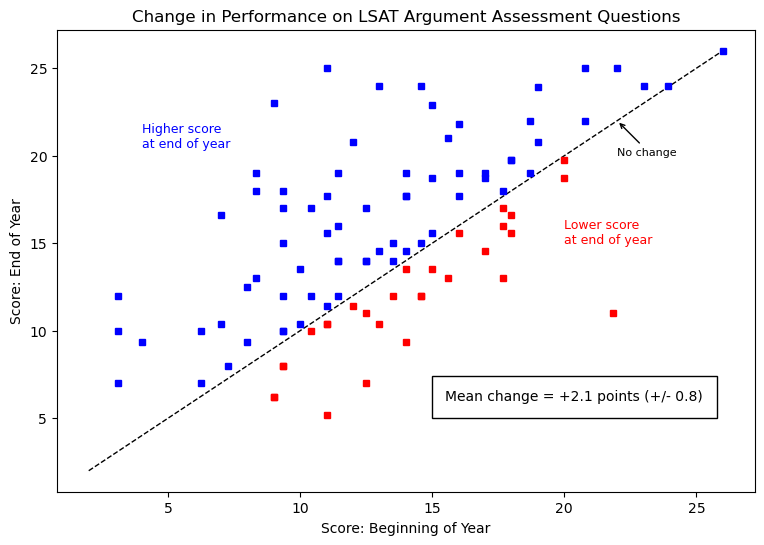

In [41]:
plt.figure(figsize=(9,6))
plt.plot((2,26),(2,26),'k--',linewidth=1)
plt.annotate('No change',xy=(22,22),xytext=(22,20),fontsize=8,
             arrowprops = dict(arrowstyle="->",connectionstyle="angle,angleA=45,angleB=135,rad=10"))
plt.plot(df_pos['Pre_26'],df_pos['Post_26'],'bs',markersize=4)
plt.plot(df_neg['Pre_26'],df_neg['Post_26'],'rs',markersize=4)
plt.title('Change in Performance on LSAT Argument Assessment Questions')
plt.xlabel('Score: Beginning of Year')
plt.ylabel('Score: End of Year')
plt.text(4,20.5,'Higher score \nat end of year',color='blue',fontsize=9)
plt.text(20,15,'Lower score \nat end of year',color='red',fontsize=9)
plt.text(15.5,6,'Mean change = +2.1 points (+/- 0.8)',color='black',bbox=dict(facecolor='none', edgecolor='black', pad=10.0))
plt.show()

**Plot for "safe" dataset**

In [35]:
# Separate those with higher scores on post-test and those with lower scores on post-test
df_safe_pos = df_safe[df_safe['Post_26']>=df_safe['Pre_26']]
df_safe_neg = df_safe[df_safe['Post_26']<df_safe['Pre_26']]

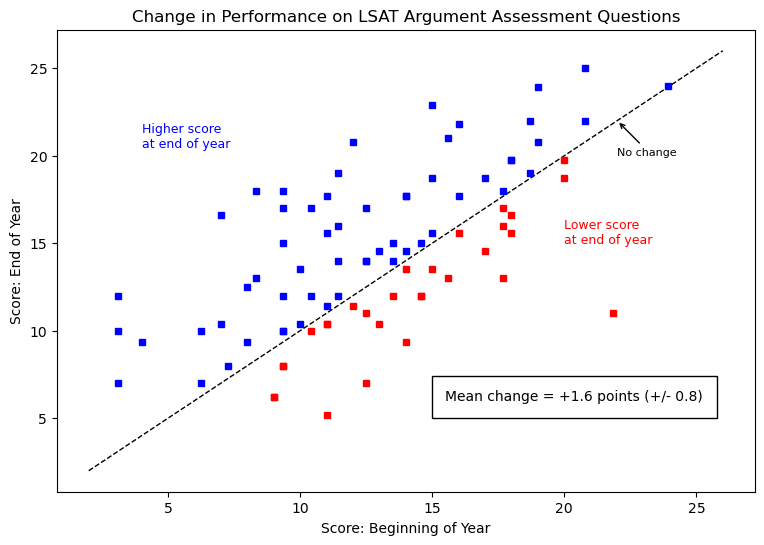

In [42]:
plt.figure(figsize=(9,6))
plt.plot((2,26),(2,26),'k--',linewidth=1)
plt.annotate('No change',xy=(22,22),xytext=(22,20),fontsize=8,
             arrowprops = dict(arrowstyle="->",connectionstyle="angle,angleA=45,angleB=135,rad=10"))
plt.plot(df_safe_pos['Pre_26'],df_safe_pos['Post_26'],'bs',markersize=4)
plt.plot(df_safe_neg['Pre_26'],df_safe_neg['Post_26'],'rs',markersize=4)
plt.title('Change in Performance on LSAT Argument Assessment Questions')
plt.xlabel('Score: Beginning of Year')
plt.ylabel('Score: End of Year')
plt.text(4,20.5,'Higher score \nat end of year',color='blue',fontsize=9)
plt.text(20,15,'Lower score \nat end of year',color='red',fontsize=9)
plt.text(15.5,6,'Mean change = +1.6 points (+/- 0.8)',color='black',bbox=dict(facecolor='none', edgecolor='black', pad=10.0))
plt.show()